In [ ]:
# Multiple regression = regression với nhiều features (X có nhiều cột)
# Ở Step 2.5, ta đã dùng 8 features → đó là multiple regression

# Phương trình: y = w₁x₁ + w₂x₂ + ... + w₈x₈ + b
# Không có gì mới về code, chỉ khác single feature (1 cột)

# Vấn đề với multiple regression:

# Khi có nhiều features tương quan cao (multicollinearity) → weights không ổn định.

# Khi có nhiều features so với samples → overfitting.

# → Cần Regularization.​

In [1]:
from sklearn.linear_model import Ridge
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Load data
data = fetch_california_housing()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Ridge với alpha=1.0
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)
y_pred_ridge = ridge.predict(X_test_scaled)

print("Ridge R²:", r2_score(y_test, y_pred_ridge))
print("Ridge RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_ridge)))


Ridge R²: 0.5758157428913686
Ridge RMSE: 0.7455567442814778


In [2]:
from sklearn.linear_model import Lasso

# Lasso với alpha=0.1
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)
y_pred_lasso = lasso.predict(X_test_scaled)

print("Lasso R²:", r2_score(y_test, y_pred_lasso))
print("Lasso RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lasso)))
print("\nLasso coefficients:", lasso.coef_)
print("Number of non-zero coefficients:", np.sum(lasso.coef_ != 0))


Lasso R²: 0.4813611325029077
Lasso RMSE: 0.8243961598848469

Lasso coefficients: [ 0.71059779  0.1064527  -0.          0.         -0.         -0.
 -0.01146856 -0.        ]
Number of non-zero coefficients: 3


In [3]:
from sklearn.linear_model import LinearRegression

# Linear Regression (no regularization)
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

# Compare
models = {
    'Linear': (lr, y_pred_lr),
    'Ridge': (ridge, y_pred_ridge),
    'Lasso': (lasso, y_pred_lasso)
}

print("Model Comparison:")
print("-" * 50)
for name, (model, y_pred) in models.items():
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f"{name:10} | R²: {r2:.4f} | RMSE: {rmse:.4f}")


Model Comparison:
--------------------------------------------------
Linear     | R²: 0.5758 | RMSE: 0.7456
Ridge      | R²: 0.5758 | RMSE: 0.7456
Lasso      | R²: 0.4814 | RMSE: 0.8244


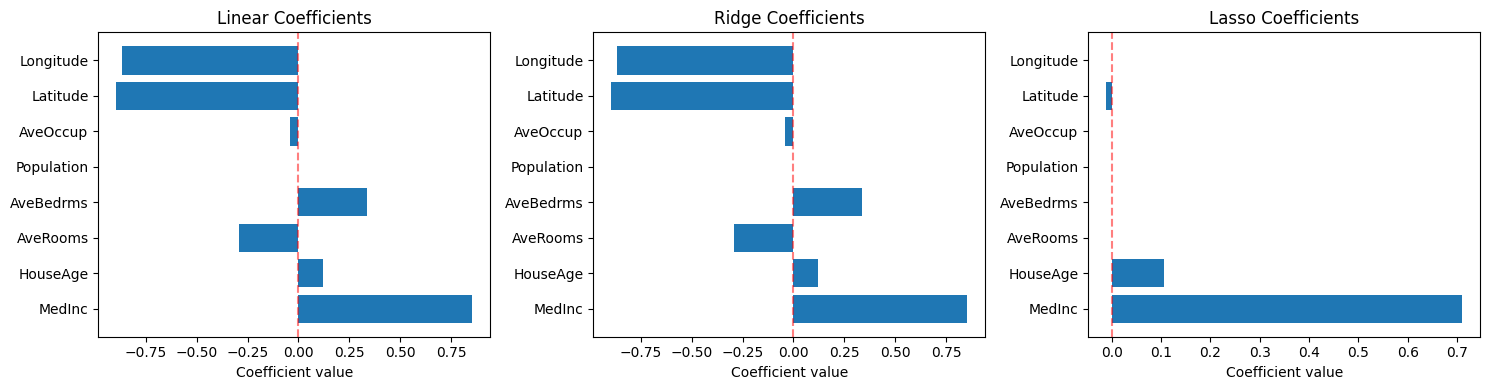

In [4]:
import matplotlib.pyplot as plt

# So sánh coefficients
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for ax, (name, (model, _)) in zip(axes, models.items()):
    ax.barh(range(len(model.coef_)), model.coef_)
    ax.set_yticks(range(len(model.coef_)))
    ax.set_yticklabels(data.feature_names)
    ax.set_xlabel('Coefficient value')
    ax.set_title(f'{name} Coefficients')
    ax.axvline(x=0, color='red', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


In [ ]:
# Quy tắc ngón tay:
"""
Linear Regression:
- Dataset nhỏ, features ít
- Không có multicollinearity
- Cần interpretability cao

Ridge (L2):
- Nhiều features tương quan cao
- Muốn giữ tất cả features
- Tránh overfitting nhẹ

Lasso (L1):
- Muốn automatic feature selection
- Nghi ngờ nhiều features không quan trọng
- Cần sparse model (ít features)
"""
